# Pattern Recognition Assignment 2
### By Sravanth Chowdary Potluri CS20B1006


In [49]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
ω1 = [1,6; 3,4; 3,8; 5,6] ω2 = [3,0; 1,-2;3,-4;5,-2]

In [50]:
# getting the data
omega_1 = np.array([[1,6],[3,4],[3,8],[5,6]])
omega_2 = np.array([[3,0],[1,-2],[3,-4],[5,-2]])

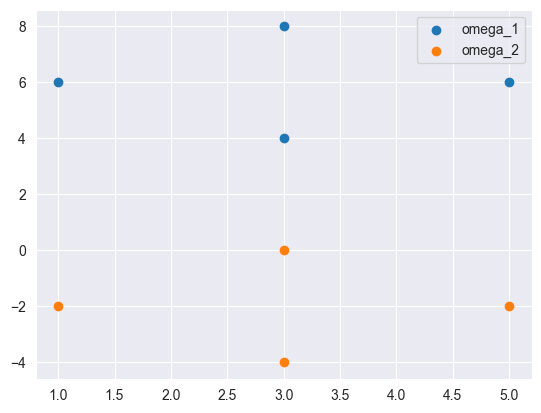

In [51]:
# plotting the data
plt.scatter(omega_1[:,0],omega_1[:,1],label='omega_1')
plt.scatter(omega_2[:,0],omega_2[:,1],label='omega_2')
plt.legend()
plt.show()

In [52]:
# getting the mean of the data for both classes
mean_1 = np.mean(omega_1,axis=0)
mean_2 = np.mean(omega_2,axis=0)

In [53]:
# displaying the mean
print('Mean for class 1:',mean_1)
print('Mean for class 2:',mean_2)

Mean for class 1: [3. 6.]
Mean for class 2: [ 3. -2.]


In [54]:
# getting the covariance matrix
cov_1 = np.cov(omega_1.T)
cov_2 = np.cov(omega_2.T)

In [55]:
# displaying the covariance matrix
print('Covariance matrix for class 1:\n',cov_1)
print('Covariance matrix for class 2:\n',cov_2)

Covariance matrix for class 1:
 [[2.66666667 0.        ]
 [0.         2.66666667]]
Covariance matrix for class 2:
 [[2.66666667 0.        ]
 [0.         2.66666667]]


since the covariance matrix is same for both classes and is a diagonal matrix of 'sigma^2' and have assumed that P(ω1) = P(ω2) so the decision boundary is given by the formula -||[ x y ]-m1||**2 + ||[x y]-m2||**2 = 0 on simplification Using Case 1 of the discriminant function

In [56]:
# getting the decision boundary
import sympy as sp
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
X = np.array([x1, x2])
diff1 = X - mean_1
diff2 = X - mean_2
g1_x =  np.matmul(diff1.T, diff1)**2
g2_x =  np.matmul(diff2.T, diff2)**2
b1 = sp.simplify(g1_x - g2_x)
b1 = sp.solve(b1, x2)
print(b1)

[2.00000000000000, 2.0 - 5.0*sqrt(-0.04*x1**2 + 0.24*x1 - 1), 5.0*sqrt(-0.04*x1**2 + 0.24*x1 - 1) + 2.0]


Decision Boundary is y=2

In [57]:
# getting the decision boundary
x = np.linspace(-2,8,100)
y = 2*np.ones(100)

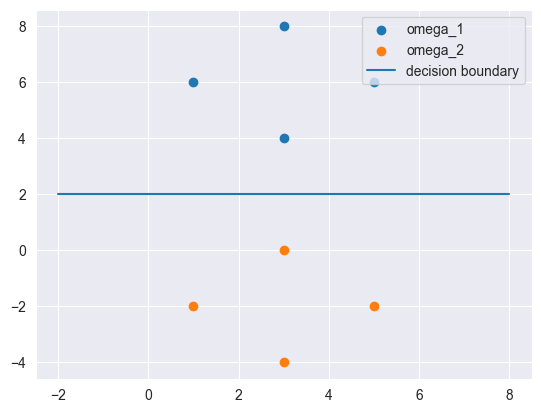

In [58]:
# plotting the decision boundary
plt.scatter(omega_1[:,0],omega_1[:,1],label='omega_1')
plt.scatter(omega_2[:,0],omega_2[:,1],label='omega_2')
plt.plot(x,y,label='decision boundary')
plt.legend()
plt.show()

Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) =0.3; P(ω2)=0.7
ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15] ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]

In [59]:
# getting the data
omega_1 = np.array([[1,-1],[2,-5],[3,-6],[4,-10],[5,-12],[6,-15]])
omega_2 = np.array([[-1,1],[-2,5],[-3,6],[-4,10],[-5,12],[-6,15]])

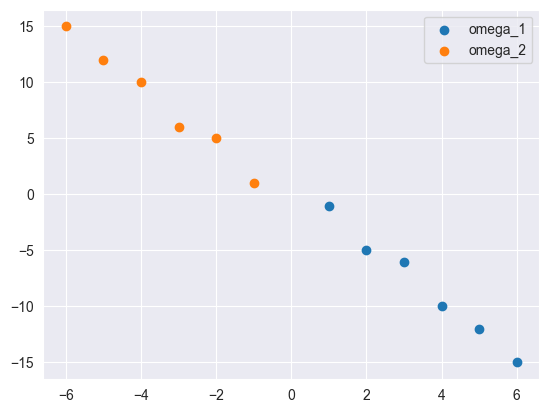

In [60]:
# plotting the data
plt.scatter(omega_1[:,0],omega_1[:,1],label='omega_1')
plt.scatter(omega_2[:,0],omega_2[:,1],label='omega_2')
plt.legend()
plt.show()

In [61]:
# getting the mean of the data for both classes
mean_1 = np.mean(omega_1,axis=0)
mean_2 = np.mean(omega_2,axis=0)

In [62]:
# displaying the mean
print('Mean for class 1:',mean_1)
print('Mean for class 2:',mean_2)

Mean for class 1: [ 3.5        -8.16666667]
Mean for class 2: [-3.5         8.16666667]


In [63]:
# getting the covariance matrix
cov_1 = np.cov(omega_1.T)
cov_2 = np.cov(omega_2.T)

In [64]:
# displaying the covariance matrix
print('Covariance matrix for class 1:\n',cov_1)
print('Covariance matrix for class 2:\n',cov_2)

Covariance matrix for class 1:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]]
Covariance matrix for class 2:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]]


In [65]:
# getting inverse of the covariance matrix
inv_cov_1 = np.linalg.inv(cov_1)
inv_cov_2 = np.linalg.inv(cov_2)

In [66]:
# displaying the inverse of the covariance matrix
print('Inverse of the covariance matrix for class 1:\n',inv_cov_1)
print('Inverse of the covariance matrix for class 2:\n',inv_cov_2)

Inverse of the covariance matrix for class 1:
 [[19.625  7.125]
 [ 7.125  2.625]]
Inverse of the covariance matrix for class 2:
 [[19.625  7.125]
 [ 7.125  2.625]]


since the covariance matrix is same for both classes and is arbitrary we use case 2 of the discriminant function

In [67]:
# getting the decision boundary
import sympy as sp
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
X = np.array([x1, x2])
diff1 = X - mean_1
diff2 = X - mean_2
g1_x =  -0.5*np.matmul(np.matmul(diff1.T, inv_cov_1), diff1)+np.log(0.3)
g2_x =  -0.5*np.matmul(np.matmul(diff2.T, inv_cov_2), diff2)+np.log(0.7)
b1 = sp.simplify(g1_x - g2_x)
b1 = sp.solve(b1, x2)
print(b1)

[0.121042551483886 - 3.0*x1]


In [68]:
# getting the decision boundary
x1 = np.linspace(-6,6,100)
y = 0.121042551483886 - 3.0*x1

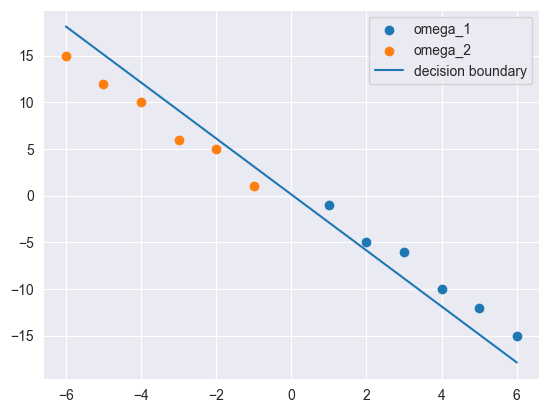

In [69]:
# plotting the decision boundary
plt.scatter(omega_1[:,0],omega_1[:,1],label='omega_1')
plt.scatter(omega_2[:,0],omega_2[:,1],label='omega_2')
plt.plot(x1,y,label='decision boundary')
plt.legend()
plt.show()

Q3. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
ω1 = [2,6; 3,4; 3,8; 4,6] ω2 = [3,0; 1,-2; 3,-4; 5,-2]

In [70]:
# getting the data
omega_1 = np.array([[2,6],[3,4],[3,8],[4,6]])
omega_2 = np.array([[3,0],[1,-2],[3,-4],[5,-2]])

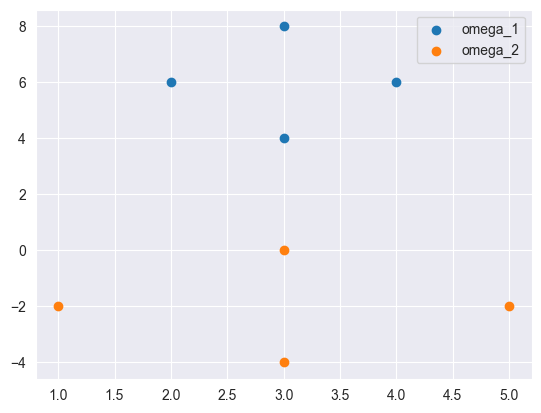

In [71]:
# plotting the data
plt.scatter(omega_1[:,0],omega_1[:,1],label='omega_1')
plt.scatter(omega_2[:,0],omega_2[:,1],label='omega_2')
plt.legend()
plt.show()

In [72]:
# getting the mean of the data for both classes
mean_1 = np.mean(omega_1,axis=0)
mean_2 = np.mean(omega_2,axis=0)

In [73]:
# displaying the mean
print('Mean for class 1:',mean_1)
print('Mean for class 2:',mean_2)

Mean for class 1: [3. 6.]
Mean for class 2: [ 3. -2.]


In [74]:
# getting the covariance matrix
cov_1 = np.cov(omega_1.T)
cov_2 = np.cov(omega_2.T)

In [75]:
# displaying the covariance matrix
print('Covariance matrix for class 1:\n',cov_1)
print('Covariance matrix for class 2:\n',cov_2)

Covariance matrix for class 1:
 [[0.66666667 0.        ]
 [0.         2.66666667]]
Covariance matrix for class 2:
 [[2.66666667 0.        ]
 [0.         2.66666667]]


In [76]:
# getting inverse of the covariance matrix
inv_cov_1 = np.linalg.inv(cov_1)
inv_cov_2 = np.linalg.inv(cov_2)

In [77]:
# displaying the inverse of the covariance matrix
print('Inverse of the covariance matrix for class 1:\n',inv_cov_1)
print('Inverse of the covariance matrix for class 2:\n',inv_cov_2)

Inverse of the covariance matrix for class 1:
 [[1.5   0.   ]
 [0.    0.375]]
Inverse of the covariance matrix for class 2:
 [[0.375 0.   ]
 [0.    0.375]]


In [78]:
# getting the determinant of the covariance matrix
det_cov_1 = np.linalg.det(cov_1)
det_cov_2 = np.linalg.det(cov_2)

In [79]:
# displaying the determinant of the covariance matrix
print('Determinant of the covariance matrix for class 1:',det_cov_1)
print('Determinant of the covariance matrix for class 2:',det_cov_2)


Determinant of the covariance matrix for class 1: 1.7777777777777777
Determinant of the covariance matrix for class 2: 7.111111111111111


we just use the general discriminant function formula for multivariate distribution

In [80]:
# getting the decision boundary
import sympy as sp
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
X = np.array([x1, x2])
diff1 = X - mean_1
diff2 = X - mean_2
g1_x =  -0.5*np.matmul(np.matmul(diff1.T, inv_cov_1), diff1)
g2_x =  -0.5*np.matmul(np.matmul(diff2.T, inv_cov_2), diff2)
b1 = sp.simplify(g1_x - g2_x)
b1 = sp.solve(b1, x2)
print(b1)

[0.1875*x1**2 - 1.125*x1 + 3.6875]


after simplification, we get the decision boundary as y = (0.5625x^2 - 3.375x +10.375)/3

In [81]:
# getting the decision boundary
x1 = np.linspace(-2,8,100)
y = 0.1875*x1**2 - 1.125*x1 + 3.6875

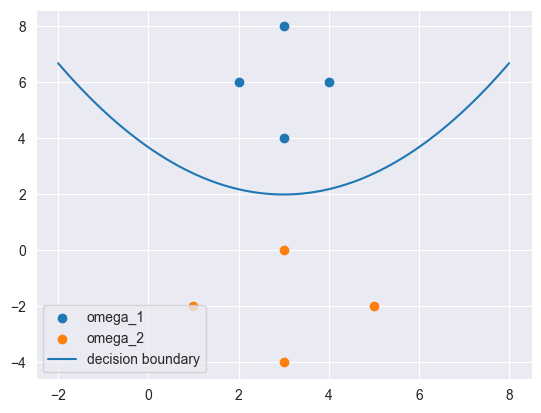

In [82]:
# plotting the decision boundary
plt.scatter(omega_1[:,0],omega_1[:,1],label='omega_1')
plt.scatter(omega_2[:,0],omega_2[:,1],label='omega_2')
plt.plot(x1,y,label='decision boundary')
plt.legend()
plt.show()

Q4. Implement Bayes Classifier for Iris Dataset.
Dataset Specifications:
Total number of samples = 150
Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
Number of samples in each class = 50
Use the following information to design classifier:
Number of training feature vectors ( first 40 in each class) = 40
Number of test feature vectors ( remaining 10 in each class) = 10
Number of dimensions = 4
Feature vector = <sepal length, sepal width, petal length, petal width>
2
If the samples follow a multivariate normal density, find the accuracy of classification for the test feature vectors.

In [83]:
# importing the dataset
df = pd.read_csv('iris.csv')

In [84]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
# removing the Id column
df = df.drop('Id',axis=1)

In [86]:
# seperating the data into classes
df_setosa = df[df['Species']=='Iris-setosa']
df_virginica = df[df['Species']=='Iris-virginica']
df_versicolor = df[df['Species']=='Iris-versicolor']

In [87]:
# removing the species column
df_setosa = df_setosa.drop('Species',axis=1)
df_virginica = df_virginica.drop('Species',axis=1)
df_versicolor = df_versicolor.drop('Species',axis=1)


In [88]:
# dividing the data into training and testing the first 40 samples are training and the remaining 10 are testing
df_setosa_train = df_setosa.iloc[:40,:]
df_setosa_test = df_setosa.iloc[40:,:]
df_virginica_train = df_virginica.iloc[:40,:]
df_virginica_test = df_virginica.iloc[40:,:]
df_versicolor_train = df_versicolor.iloc[:40,:]
df_versicolor_test = df_versicolor.iloc[40:,:]

In [89]:
# getting the mean of the data for all the classes
mean_setosa = np.mean(df_setosa_train,axis=0)
mean_virginica = np.mean(df_virginica_train,axis=0)
mean_versicolor = np.mean(df_versicolor_train,axis=0)

In [90]:
# displaying the mean for all the classes
print(mean_setosa)
print(mean_virginica)
print(mean_versicolor)

SepalLengthCm    5.0375
SepalWidthCm     3.4400
PetalLengthCm    1.4625
PetalWidthCm     0.2325
dtype: float64
SepalLengthCm    6.6225
SepalWidthCm     2.9600
PetalLengthCm    5.6075
PetalWidthCm     1.9900
dtype: float64
SepalLengthCm    6.0100
SepalWidthCm     2.7800
PetalLengthCm    4.3175
PetalWidthCm     1.3500
dtype: float64


In [91]:
#getting the covariance matrix for all the classes
cov_setosa = np.cov(df_setosa_train.T)
cov_virginica = np.cov(df_virginica_train.T)
cov_versicolor = np.cov(df_versicolor_train.T)

In [92]:
# displaying the covariance matrix for all the classes
print(cov_setosa)
print(cov_virginica)
print(cov_versicolor)

[[0.13112179 0.09897436 0.01298077 0.01362179]
 [0.09897436 0.13271795 0.00205128 0.0145641 ]
 [0.01298077 0.00205128 0.02958333 0.00458333]
 [0.01362179 0.0145641  0.00458333 0.00994231]]
[[0.46794231 0.11041026 0.35777564 0.05125641]
 [0.11041026 0.11323077 0.08107692 0.04625641]
 [0.35777564 0.08107692 0.34532692 0.05930769]
 [0.05125641 0.04625641 0.05930769 0.07425641]]
[[0.27374359 0.08661538 0.17212821 0.05230769]
 [0.08661538 0.11087179 0.08087179 0.04538462]
 [0.17212821 0.08087179 0.20353205 0.07371795]
 [0.05230769 0.04538462 0.07371795 0.04307692]]


In [93]:
# getting the inverse of the covariance matrix for all the classes
inv_cov_setosa = np.linalg.inv(cov_setosa)
inv_cov_virginica = np.linalg.inv(cov_virginica)
inv_cov_versicolor = np.linalg.inv(cov_versicolor)

In [94]:
#displaying the inverse of cov matrix for all the classes
print(inv_cov_setosa)
print(inv_cov_virginica)
print(inv_cov_versicolor)

[[ 18.96620997 -13.74680415  -6.95996886  -2.63963858]
 [-13.74680415  19.00598614   6.57939373 -12.03991503]
 [ -6.95996886   6.57939373  39.21733422 -18.18107202]
 [ -2.63963858 -12.03991503 -18.18107202 130.21494869]]
[[ 12.06774374  -4.8891638  -12.10821285   4.38637019]
 [ -4.8891638   14.82114236   3.00369869  -8.25671873]
 [-12.10821285   3.00369869  15.78668513  -6.12187765]
 [  4.38637019  -8.25671873  -6.12187765  20.47191629]]
[[  9.13333334  -4.07640785  -9.58250752   9.60294701]
 [ -4.07640785  17.71179608   3.61868629 -19.90341079]
 [ -9.58250752   3.61868629  23.00463124 -31.54468702]
 [  9.60294701 -19.90341079 -31.54468702  86.50595261]]


In [95]:
# function to return the value of the three discriminant functions
def discriminant_function(x,mean,cov,inv_cov):
    return -0.5*np.dot(np.dot((x-mean).T,inv_cov),(x-mean)) - 0.5*np.log(np.linalg.det(cov)) + np.log(1/3)

# function to return the values of the three discriminant functions for all the classes
def discriminant_function_all(x):
    return [discriminant_function(x,mean_setosa,cov_setosa,inv_cov_setosa),discriminant_function(x,mean_virginica,cov_virginica,inv_cov_virginica),discriminant_function(x,mean_versicolor,cov_versicolor,inv_cov_versicolor)]

# function to return the class of the sample
def classify(x):
    return np.argmax(discriminant_function_all(x))


In [96]:
# passing the test data of setosa to the classifier
y_pred_setosa = []
for i in range(10):
    y_pred_setosa.append(classify(df_setosa_test.iloc[i,:]))

In [97]:
# displaying the predicted values
print(y_pred_setosa)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [98]:
# displaying the accuracy using sklearn
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score([0,0,0,0,0,0,0,0,0,0],y_pred_setosa)*100,'%')

Accuracy =  100.0 %


In [99]:
# passing the test data of virginica to the classifier
y_pred_virginica = []
for i in range(10):
    y_pred_virginica.append(classify(df_virginica_test.iloc[i,:]))

In [100]:
# displaying the predicted values
print(y_pred_virginica)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [101]:
# displaying the accuracy using sklearn
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score([1,1,1,1,1,1,1,1,1,1],y_pred_virginica)*100,'%')

Accuracy =  100.0 %


In [102]:
# passing the test data of versicolor to the classifier
y_pred_versicolor = []
for i in range(10):
    y_pred_versicolor.append(classify(df_versicolor_test.iloc[i,:]))

In [103]:
# displaying the predicted values
print(y_pred_versicolor)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [104]:
# displaying the accuracy using sklearn
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score([2,2,2,2,2,2,2,2,2,2],y_pred_versicolor)*100,'%')

Accuracy =  100.0 %


We have achieved an accuracy of 100 percent among the three classes which means that the total accuracy is also 100 percent.

In [105]:
# importing the dataset
df = pd.read_csv('iris.csv')

In [106]:
#displaying the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [107]:
# dropping the Id,SepalLengthCm,SepalWidthCm columns
df = df.drop(['Id','SepalLengthCm','SepalWidthCm'],axis=1)

In [108]:
df

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [109]:
# seperating the data into classes
df_setosa = df[df['Species']=='Iris-setosa']
df_virginica = df[df['Species']=='Iris-virginica']
df_versicolor = df[df['Species']=='Iris-versicolor']

In [110]:
# removing the species column
df_setosa = df_setosa.drop('Species',axis=1)
df_virginica = df_virginica.drop('Species',axis=1)
df_versicolor = df_versicolor.drop('Species',axis=1)

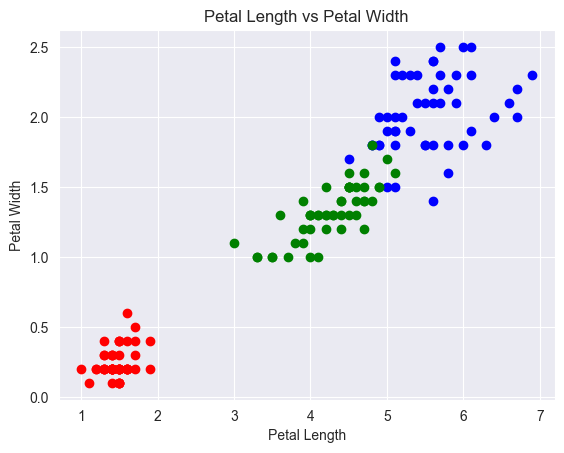

In [111]:
# plotting the data
plt.scatter(df_setosa['PetalLengthCm'],df_setosa['PetalWidthCm'],color='red')
plt.scatter(df_virginica['PetalLengthCm'],df_virginica['PetalWidthCm'],color='blue')
plt.scatter(df_versicolor['PetalLengthCm'],df_versicolor['PetalWidthCm'],color='green')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

In [112]:
# getting the mean of the data for all the classes
mean_setosa = np.mean(df_setosa,axis=0)
mean_virginica = np.mean(df_virginica,axis=0)
mean_versicolor = np.mean(df_versicolor,axis=0)

In [113]:
# displaying the mean for all the classes
print(mean_setosa)
print(mean_virginica)
print(mean_versicolor)

PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64
PetalLengthCm    5.552
PetalWidthCm     2.026
dtype: float64
PetalLengthCm    4.260
PetalWidthCm     1.326
dtype: float64


In [114]:
#getting the covariance matrix for all the classes
cov_setosa = np.cov(df_setosa.T)
cov_virginica = np.cov(df_virginica.T)
cov_versicolor = np.cov(df_versicolor.T)

In [115]:
#displaying the covariance matrix for all the classes
print(cov_setosa)
print(cov_virginica)
print(cov_versicolor)

[[0.03010612 0.00569796]
 [0.00569796 0.01149388]]
[[0.30458776 0.04882449]
 [0.04882449 0.07543265]]
[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


In [116]:
# getting the inverse of the covariance matrix for all the classes
inv_cov_setosa = np.linalg.inv(cov_setosa)
inv_cov_virginica = np.linalg.inv(cov_virginica)
inv_cov_versicolor = np.linalg.inv(cov_versicolor)

In [117]:
#displaying the inverse of cov matrix for all the classes
print(inv_cov_setosa)
print(inv_cov_virginica)
print(inv_cov_versicolor)

[[ 36.65497822 -18.17128892]
 [-18.17128892  96.0110509 ]]
[[ 3.66319625 -2.37103801]
 [-2.37103801 14.79153491]]
[[ 11.88144095 -22.2102711 ]
 [-22.2102711   67.08965196]]


we have to find three decision boundaries for three classes using the general multivariate formula since the covariance matrices are arbitrary

In [118]:
# using sympy to solve the equation
import sympy as sp
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
X = np.array([x1,x2])
diff1 = X-mean_setosa
diff2 = X-mean_virginica
diff3 = X-mean_versicolor
g1_x = -1 / 2 *(np.matmul(np.matmul(diff1, inv_cov_setosa), diff1.T)) + -1 / 2 * np.log(abs(np.linalg.det(cov_setosa)))
g2_x = -1 / 2 *(np.matmul(np.matmul(diff2, inv_cov_virginica), diff2.T)) + -1 / 2 * np.log(abs(np.linalg.det(cov_virginica)))
g3_x = -1 / 2 *(np.matmul(np.matmul(diff3, inv_cov_versicolor), diff3.T)) + -1 / 2 * np.log(abs(np.linalg.det(cov_versicolor)))
b1 = sp.simplify(g1_x-g2_x)
b1 = sp.solve(b1,x2)
b2 = sp.simplify(g2_x-g3_x)
b2 = sp.solve(b2,x2)
b3 = sp.simplify(g3_x-g1_x)
b3 = sp.solve(b3,x2)
print(b1)
print(b2)
print(b3)

[0.194537614676535*x1 - 0.856743491745518*sqrt(-0.501846727754526*x1**2 + x1 + 0.974471851098734) - 0.245996507131731, 0.194537614676535*x1 + 0.856743491745518*sqrt(-0.501846727754526*x1**2 + x1 + 0.974471851098734) - 0.245996507131731]
[0.379348898379015*x1 - 0.969021830332695*sqrt(-0.0140965221198476*x1**2 - 0.117692978621301*x1 + 1) - 0.429432728163691, 0.379348898379015*x1 + 0.969021830332695*sqrt(-0.0140965221198476*x1**2 - 0.117692978621301*x1 + 1) - 0.429432728163691]
[-0.139653762724135*x1 - 1.38449873376855*sqrt(-0.436697803198121*x1**2 + x1 + 0.251234530609431) + 0.0857083657727485, -0.139653762724135*x1 + 1.38449873376855*sqrt(-0.436697803198121*x1**2 + x1 + 0.251234530609431) + 0.0857083657727485]


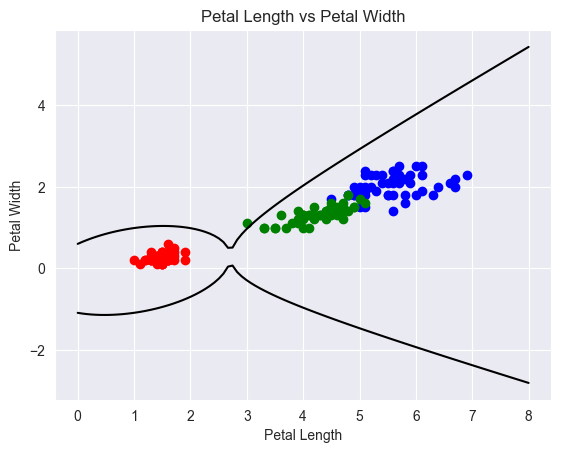

In [119]:
# plotting the decision boundaries
plt.scatter(df_setosa['PetalLengthCm'],df_setosa['PetalWidthCm'],color='red')
plt.scatter(df_virginica['PetalLengthCm'],df_virginica['PetalWidthCm'],color='blue')
plt.scatter(df_versicolor['PetalLengthCm'],df_versicolor['PetalWidthCm'],color='green')
# plotting boundary 1 between setosa and virginica using the equation
x1 = np.linspace(0,8,100)
y = 0.194537614676535*x1 - 0.856743491745518*(abs(-0.501846727754526*x1**2 + x1 + 0.974471851098734)**0.5) - 0.245996507131731, 0.194537614676535*x1 + 0.856743491745518*(abs(-0.501846727754526*x1**2 + x1 + 0.974471851098734))**0.5 - 0.245996507131731
plt.plot(x1,y[0],color='black')
plt.plot(x1,y[1],color='black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

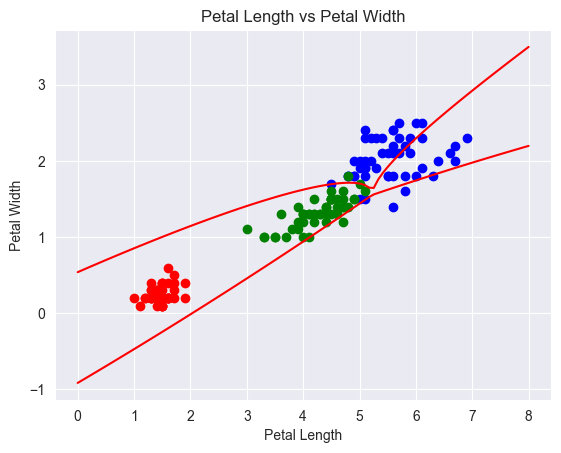

In [120]:
# plotting the decision boundaries
plt.scatter(df_setosa['PetalLengthCm'],df_setosa['PetalWidthCm'],color='red')
plt.scatter(df_virginica['PetalLengthCm'],df_virginica['PetalWidthCm'],color='blue')
plt.scatter(df_versicolor['PetalLengthCm'],df_versicolor['PetalWidthCm'],color='green')
# plotting boundary 2 between virginica and versicolor using the equation
x1 = np.linspace(0,8,100)
y = 0.379348898379015*x1 - 0.969021830332695*(abs(-0.0140965221198476*x1**2 - 0.117692978621301*x1 + 1))*0.5 - 0.429432728163691, 0.379348898379015*x1 + 0.969021830332695*(abs(-0.0140965221198476*x1**2 - 0.117692978621301*x1 + 1))**0.5 - 0.429432728163691
plt.plot(x1,y[0],color='red')
plt.plot(x1,y[1],color='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

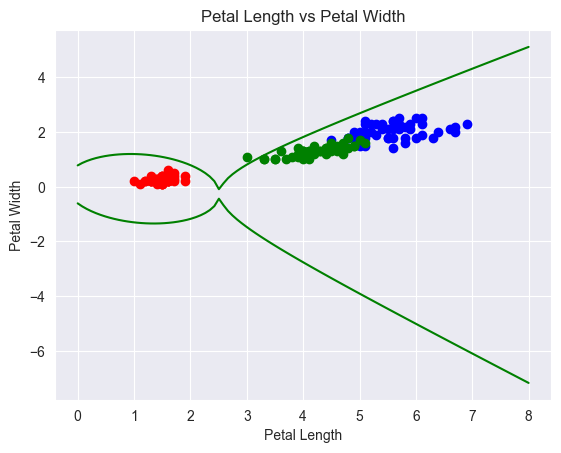

In [121]:
# plotting the decision boundaries
plt.scatter(df_setosa['PetalLengthCm'],df_setosa['PetalWidthCm'],color='red')
plt.scatter(df_virginica['PetalLengthCm'],df_virginica['PetalWidthCm'],color='blue')
plt.scatter(df_versicolor['PetalLengthCm'],df_versicolor['PetalWidthCm'],color='green')
# plotting boundary 3 between versicolor and setosa using the equation
x1 = np.linspace(0,8,100)
y = -0.139653762724135*x1 - 1.38449873376855*(abs(-0.436697803198121*x1**2 + x1 + 0.251234530609431))**0.5 + 0.0857083657727485, -0.139653762724135*x1 + 1.38449873376855*(abs(-0.436697803198121*x1**2 + x1 + 0.251234530609431))**0.5 + 0.0857083657727485
plt.plot(x1,y[0],color='green')
plt.plot(x1,y[1],color='green')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

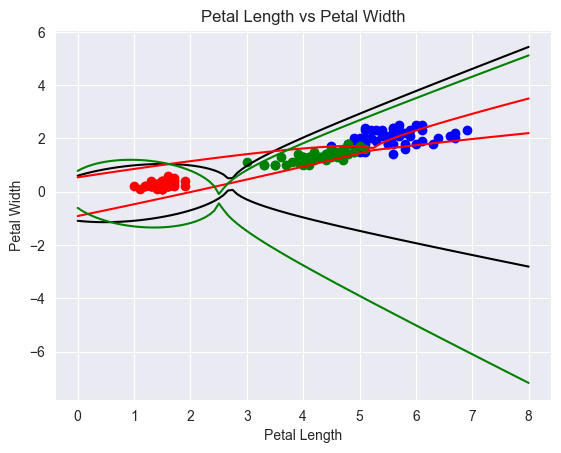

In [122]:
# plotting the decision boundaries all at once
plt.scatter(df_setosa['PetalLengthCm'],df_setosa['PetalWidthCm'],color='red')
plt.scatter(df_virginica['PetalLengthCm'],df_virginica['PetalWidthCm'],color='blue')
plt.scatter(df_versicolor['PetalLengthCm'],df_versicolor['PetalWidthCm'],color='green')
# plotting boundary 1 between setosa and virginica using the equation
x1 = np.linspace(0,8,100)
y = 0.194537614676535*x1 - 0.856743491745518*(abs(-0.501846727754526*x1**2 + x1 + 0.974471851098734)**0.5) - 0.245996507131731, 0.194537614676535*x1 + 0.856743491745518*(abs(-0.501846727754526*x1**2 + x1 + 0.974471851098734))**0.5 - 0.245996507131731
plt.plot(x1,y[0],color='black')
plt.plot(x1,y[1],color='black')
# plotting boundary 2 between virginica and versicolor using the equation
x1 = np.linspace(0,8,100)
y = 0.379348898379015*x1 - 0.969021830332695*(abs(-0.0140965221198476*x1**2 - 0.117692978621301*x1 + 1))*0.5 - 0.429432728163691, 0.379348898379015*x1 + 0.969021830332695*(abs(-0.0140965221198476*x1**2 - 0.117692978621301*x1 + 1))**0.5 - 0.429432728163691
plt.plot(x1,y[0],color='red')
plt.plot(x1,y[1],color='red')
# plotting boundary 3 between versicolor and setosa using the equation
x1 = np.linspace(0,8,100)
y = -0.139653762724135*x1 - 1.38449873376855*(abs(-0.436697803198121*x1**2 + x1 + 0.251234530609431))**0.5 + 0.0857083657727485, -0.139653762724135*x1 + 1.38449873376855*(abs(-0.436697803198121*x1**2 + x1 + 0.251234530609431))**0.5 + 0.0857083657727485
plt.plot(x1,y[0],color='green')
plt.plot(x1,y[1],color='green')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

Q6. Consider the 128- dimensional feature vectors given in the “face feature vectors.csv” file. Use the following information to design and implement a Bayes Classifier.
Dataset Specifications:
Total number of samples = 800
Number of classes = 2 ( labelled as “male” and “female”)
Samples from “1 to 400” belongs to class “male”
Samples from “401 to 800” belongs to class “female”
Number of samples per class = 400
Use the following information to design classifier:
Number of test samples ( first 5 in each class) = 5
Number of training samples ( remaining 395 in each class) = 395
Number of dimensions = 128

In [123]:
# importing the dataset
df = pd.read_csv('face feature vectors.csv')
df.head()

,Unnamed: 0,gender,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [124]:
# dropping the first column
df = df.drop(['Unnamed: 0'],axis=1)

In [125]:
#seperating male and female into two other dataframes
df_male = df[df["gender"]== "male"]
df_female = df[df["gender"]== "female"]

In [126]:
# dropping the gender column
df_male = df_male.drop(["gender"],axis=1)
df_female=df_female.drop(["gender"],axis=1)

In [127]:
# seperating the first 5 rows from each dataframe as test rows
df_male_test = df_male[:5]
df_male = df_male[5:]
df_female_test = df_female[:5]
df_female = df_female[5:]

In [128]:
# generating the mean for the data
mean_male = np.mean(df_male,axis=0)
mean_female = np.mean(df_female,axis=0)

In [129]:
# displaying the mean
print(mean_male)
print(mean_female)

0     -0.091268
1      0.092663
2      0.043765
3     -0.030270
4     -0.093455
         ...   
123   -0.118024
124    0.022343
125   -0.024776
126    0.019414
127    0.039645
Length: 128, dtype: float64
0     -0.117703
1      0.076545
2      0.081977
3     -0.077487
4     -0.122954
         ...   
123   -0.087131
124    0.053732
125   -0.031716
126    0.003645
127    0.026455
Length: 128, dtype: float64


In [130]:
# generating the covariance matrix
cov_male = np.cov(df_male.T)
cov_female = np.cov(df_female.T)

In [131]:
print(cov_male)
print(cov_female)

[[ 3.16328105e-03 -5.73157407e-04 -2.97682846e-04 ...  6.51347798e-04
  -2.27358422e-04 -9.89172734e-05]
 [-5.73157407e-04  2.26105296e-03  3.65259665e-04 ... -3.45937850e-04
  -2.92078249e-04 -2.04208450e-04]
 [-2.97682846e-04  3.65259665e-04  2.53021267e-03 ... -3.45438227e-04
   9.79811329e-05 -8.84490101e-05]
 ...
 [ 6.51347798e-04 -3.45937850e-04 -3.45438227e-04 ...  2.45628403e-03
   6.15939584e-05 -4.22971785e-05]
 [-2.27358422e-04 -2.92078249e-04  9.79811329e-05 ...  6.15939584e-05
   2.40397561e-03  2.63357714e-04]
 [-9.89172734e-05 -2.04208450e-04 -8.84490101e-05 ... -4.22971785e-05
   2.63357714e-04  1.75921775e-03]]
[[ 2.43711101e-03 -3.95885633e-04  3.67424485e-04 ...  1.36032497e-04
  -2.26478736e-04 -1.67995298e-04]
 [-3.95885633e-04  2.56543670e-03  4.68945752e-05 ... -4.80147458e-04
  -1.33853743e-04  5.71641092e-05]
 [ 3.67424485e-04  4.68945752e-05  1.93964903e-03 ... -1.36830421e-04
  -1.93336592e-04  4.04063807e-04]
 ...
 [ 1.36032497e-04 -4.80147458e-04 -1.3683042

In [132]:
# generating inverse covariance matrix
inv_cov_male = np.linalg.inv(cov_male)
inv_cov_female = np.linalg.inv(cov_female)

In [133]:
print(inv_cov_male)
print(inv_cov_female)

[[ 6.38341341e+13  2.55764251e+12  1.65653696e+13 ...  2.24197898e+12
  -1.34843430e+13  3.53808305e+13]
 [ 2.55473333e+12  1.00124809e+14 -8.15969667e+12 ...  6.62889076e+12
   1.65472615e+13  3.03083502e+12]
 [ 1.65658318e+13 -8.15960370e+12  6.30278699e+13 ... -1.05593569e+13
  -1.26783710e+13 -1.76410309e+13]
 ...
 [ 2.24286424e+12  6.63065743e+12 -1.05592357e+13 ...  8.39593694e+13
   1.44344181e+13 -8.16056685e+12]
 [-1.34816145e+13  1.65437883e+13 -1.26756968e+13 ...  1.44350798e+13
   1.21175487e+14 -2.31688016e+12]
 [ 3.53792301e+13  3.02911028e+12 -1.76412242e+13 ... -8.16126089e+12
  -2.30898531e+12  1.21198501e+14]]
[[ 7.58363664e+13 -4.94541071e+12  1.95798053e+13 ...  1.15644225e+12
  -2.88109992e+13  3.93984648e+13]
 [-4.94451238e+12  7.59786514e+13 -1.73577165e+13 ...  7.47222940e+12
   1.27230094e+13  3.09983847e+11]
 [ 1.95767804e+13 -1.73597009e+13  6.96239387e+13 ... -1.03239024e+13
  -2.59629849e+13 -1.03188003e+13]
 ...
 [ 1.15923224e+12  7.47574982e+12 -1.0323664

In [134]:
# function to return the value of the three discriminant functions
def discriminant_function(x,mean,cov,inv_cov):
    return -0.5*np.dot(np.dot((x-mean).T,inv_cov),(x-mean))  + np.log(1/2)

# function to return the values of the three discriminant functions for all the classes
def discriminant_function_all(x):
    return [discriminant_function(x,mean_male,cov_male,inv_cov_male),discriminant_function(x,mean_female,cov_female,inv_cov_female)]

# function to return the class of the sample
def classify(x):
    return np.argmax(discriminant_function_all(x))

we eliminate the log(det(cov)) term as it is extremely small and does not affect the result

In [135]:
# passing the test data of male to the classifier
y_pred_male = []
for i in range(5):
    y_pred_male.append(classify(df_male_test.iloc[i,:]))
print(y_pred_male)

[0, 0, 0, 0, 0]


In [136]:
# # passing the test data of female to the classifier
y_pred_female = []
for i in range(5):
    y_pred_female.append(classify(df_female_test.iloc[i,:]))
print(y_pred_female)

[0, 1, 1, 1, 1]


as you can clearly see in this case the classifier predicts 100% accuracy in the male class 80% accuracy in the female class and 90% accuracy on a whole